# Decision Tree-2


You are a data scientist working for a healthcare company, and you have been tasked with creating a 
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been 
given a dataset (diabetes.csv) with the following variables:

1. Pregnancies: Number of times pregnant (integer)

2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)

3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)

4. SkinThickness: Triceps skin fold thickness (mm) (integer)

5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)

6. BMI: Body mass index (weight in kg/(height in m)^2) (float)

7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes 
based on family history) (float)

8. Age: Age in years (integer)

9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to 
understand the distribution and relationships between the variables.

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical 
variables into dummy variables if necessary.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use 
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, 
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important 
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and 
trends.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the 
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and 
risks

# SOLUTIONS:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

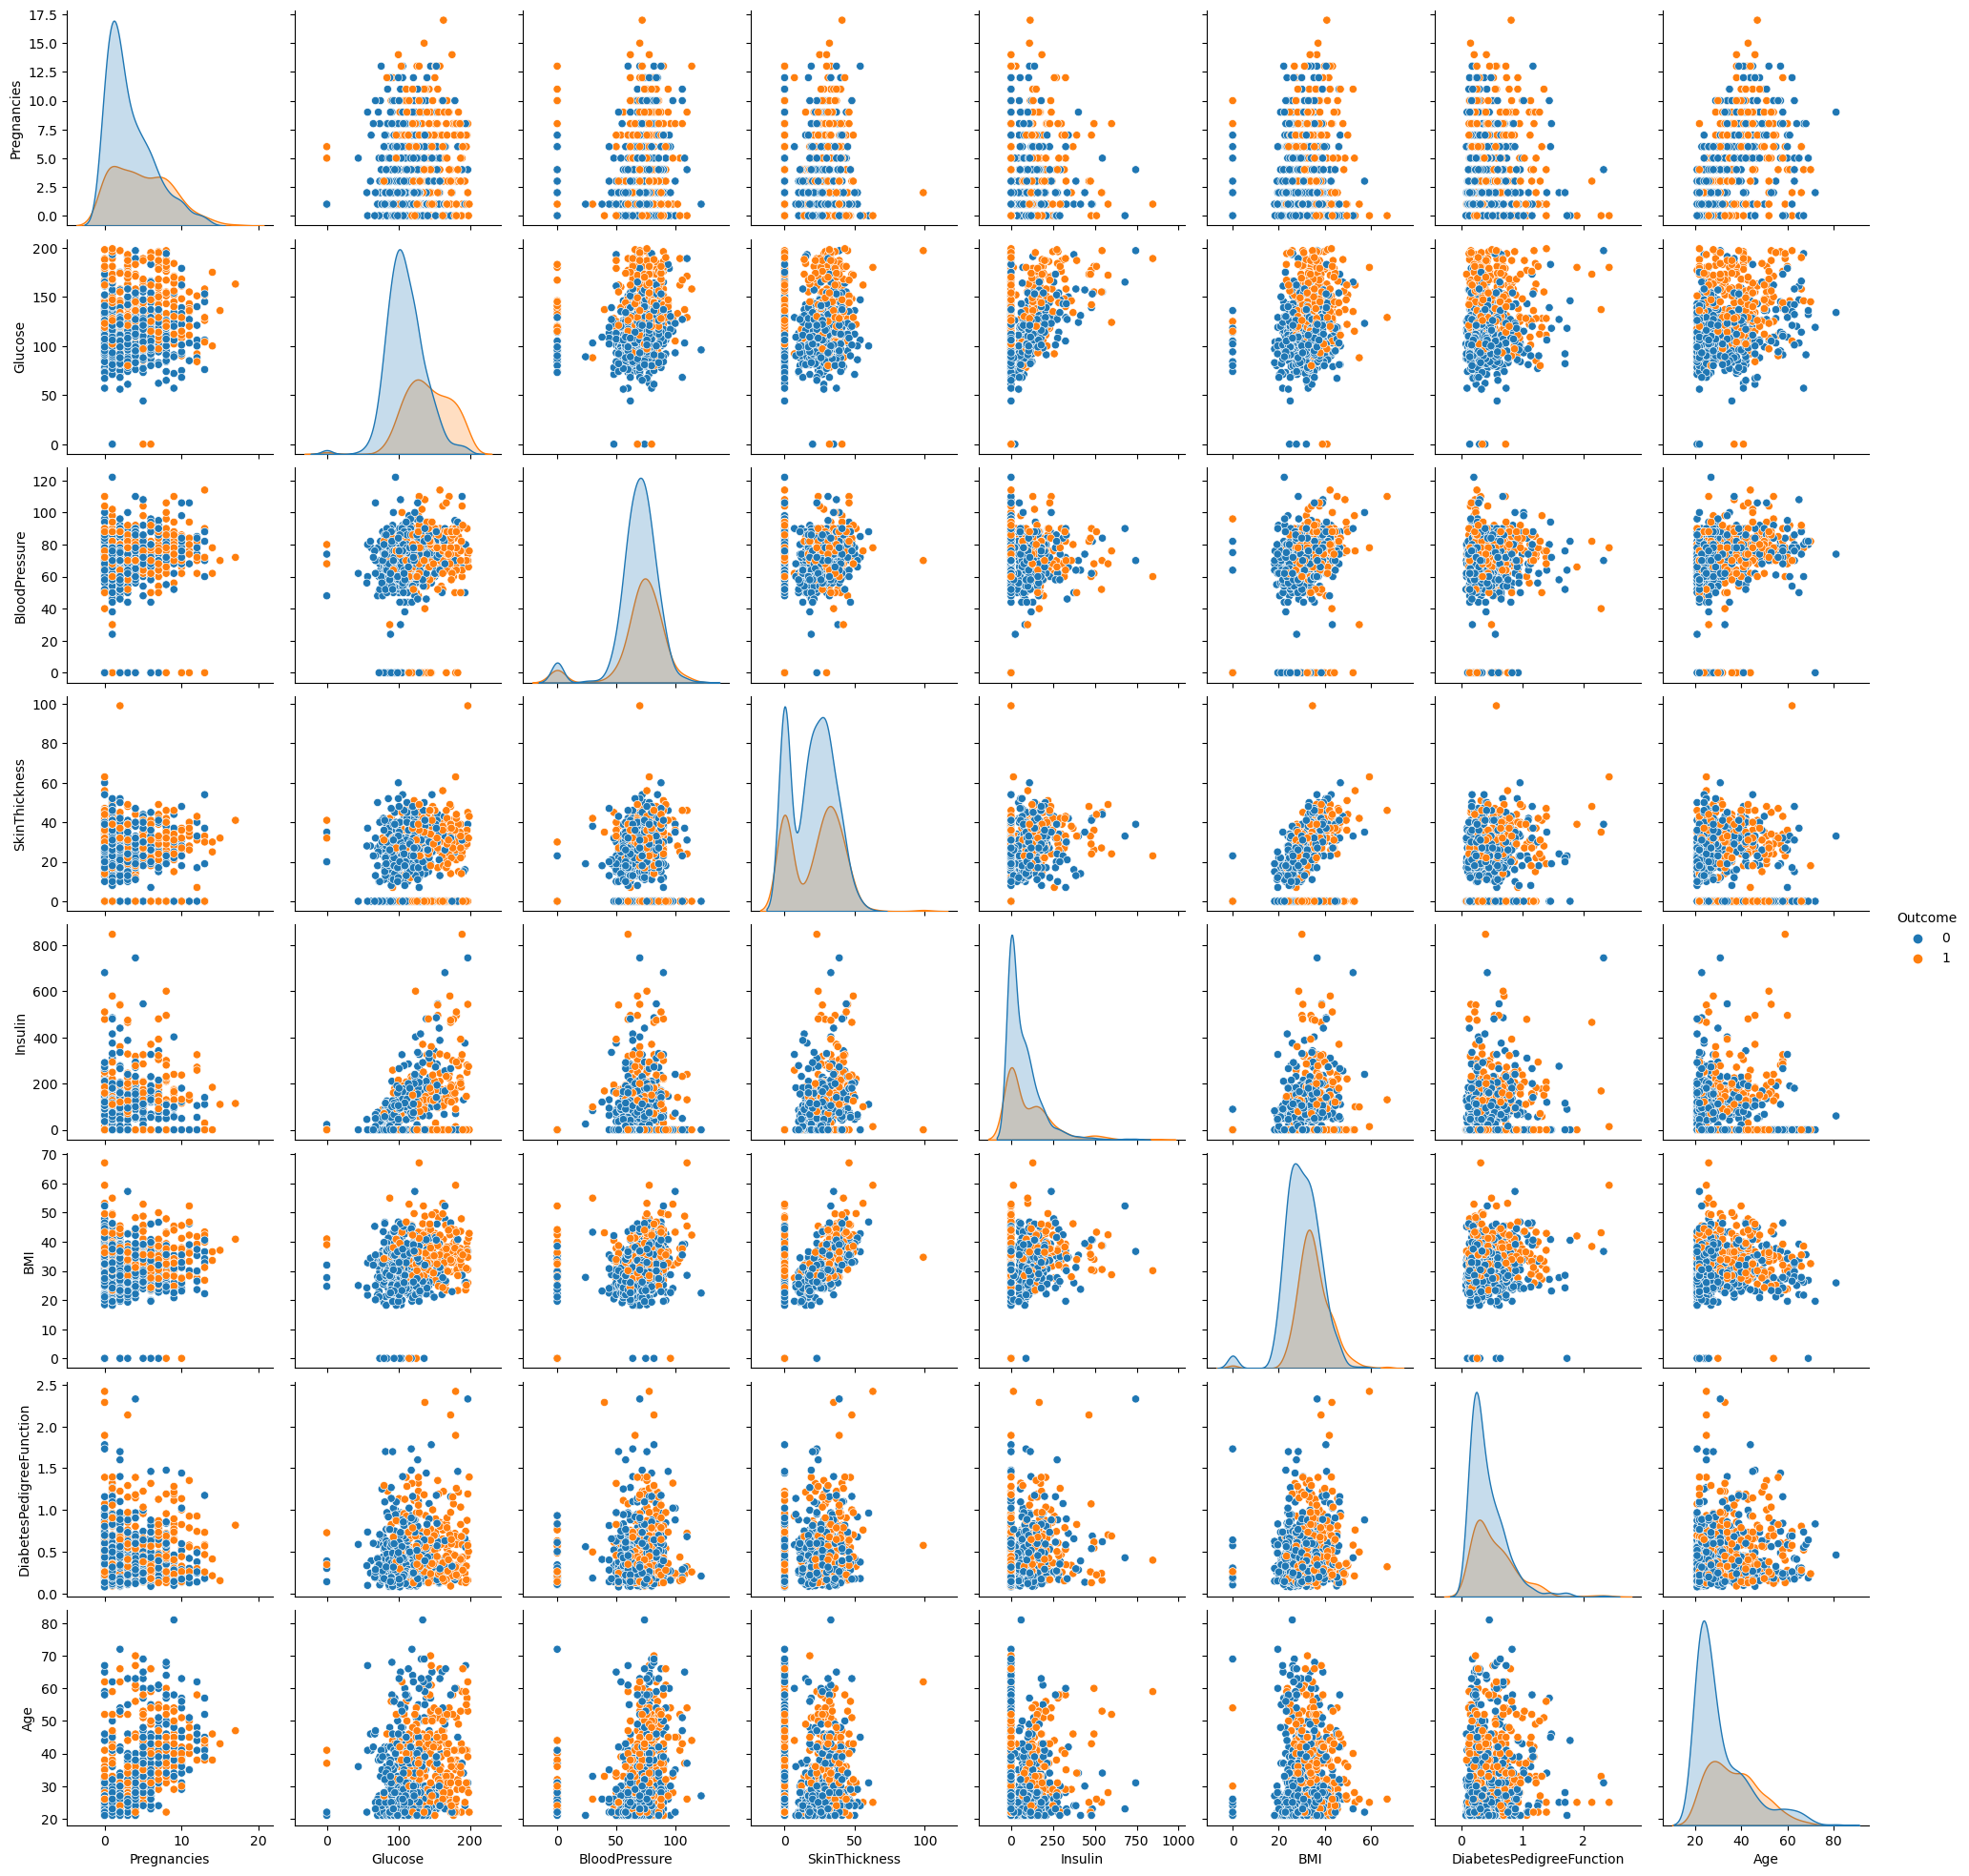

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('C:/Users/Bharath/Downloads/diabetes.csv')

# Display basic statistics
print(data.describe())

# Visualize relationships between variables
sns.pairplot(data, hue="Outcome", diag_kind="kde")
plt.show()


In [4]:
# Handle missing values (assuming missing values are indicated by 0)
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, data.median())

# Remove outliers (you can use different techniques)
# Example: Remove rows where BMI is an outlier
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['BMI'] >= Q1 - 1.5 * IQR) & (data['BMI'] <= Q3 + 1.5 * IQR)]

# Transform categorical variables (if any) into dummy variables

# Check if any categorical variables exist and handle them accordingly


In [5]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (e.g., 70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning and cross-validation
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10,
                       random_state=42)

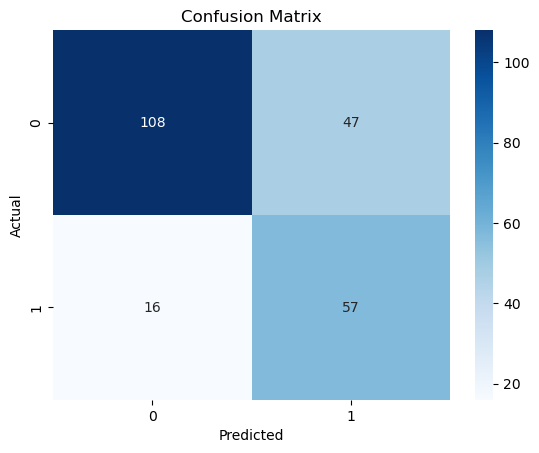

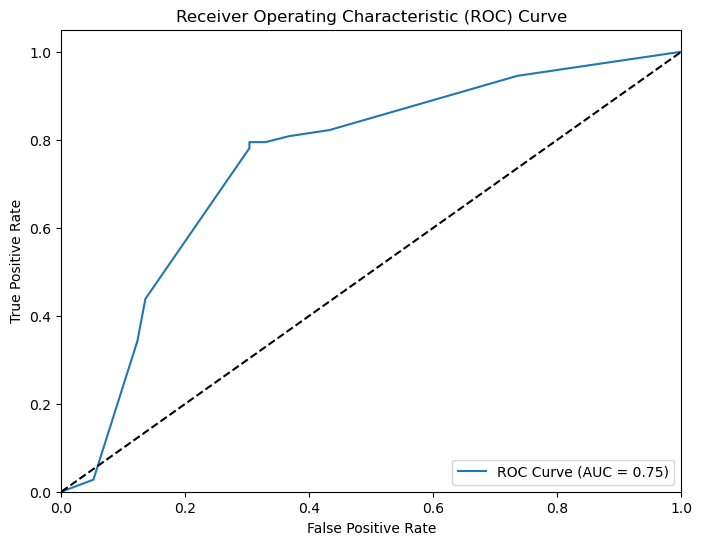

Accuracy: 0.72
Precision: 0.55
Recall: 0.78
F1 Score: 0.64


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_prob = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Visualize the results (e.g., confusion matrix, ROC curve)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


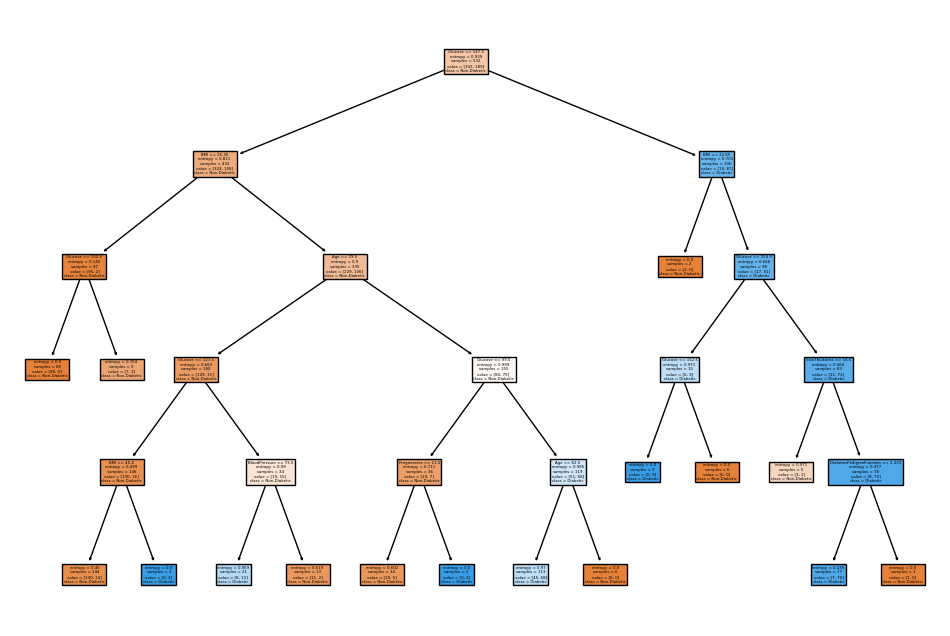

In [8]:
# Visualize the decision tree (if it's not too large)
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True)
plt.show()

# You can interpret the tree structure and identify important variables and thresholds
# The top splits provide insights into the most important features


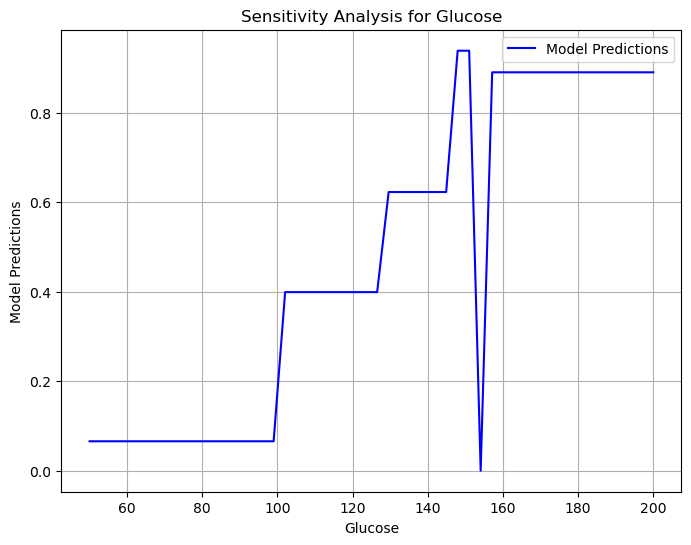

In [9]:
import numpy as np

# Function to perform sensitivity analysis
def sensitivity_analysis(model, X, feature_name, range_min, range_max, num_points=50):
    """
    Perform sensitivity analysis by varying a feature within a given range and observing the model's predictions.

    Parameters:
        model (object): The trained machine learning model.
        X (DataFrame): The dataset with feature values.
        feature_name (str): The name of the feature to vary.
        range_min (float): The minimum value for the feature.
        range_max (float): The maximum value for the feature.
        num_points (int): The number of points to sample within the given range.

    Returns:
        Tuple: Arrays containing the range of feature values and corresponding model predictions.
    """
    feature_values = np.linspace(range_min, range_max, num_points)
    predictions = []

    for value in feature_values:
        X_copy = X.copy()
        X_copy[feature_name] = value
        y_pred = model.predict(X_copy)
        predictions.append(y_pred.mean())

    return feature_values, predictions

# Perform sensitivity analysis for a specific feature (e.g., Glucose)
feature_name = 'Glucose'
range_min = 50  # Minimum value for Glucose
range_max = 200  # Maximum value for Glucose
num_points = 50  # Number of points to sample

# Perform sensitivity analysis
feature_values, predictions = sensitivity_analysis(best_dt_classifier, X_test, feature_name, range_min, range_max, num_points)

# Visualize the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(feature_values, predictions, label='Model Predictions', color='b')
plt.xlabel(feature_name)
plt.ylabel('Model Predictions')
plt.title('Sensitivity Analysis for {}'.format(feature_name))
plt.legend()
plt.grid(True)
plt.show()
